In [ ]:
#  https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables

'''
Looking at the Dow Jones index data in the CNN-pred stock data. 

Found the correlation between all the features, and ran some code to cluster all those that are highly correlated, 
and select the best one from each cluster. 

'''


In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import datetime 


In [2]:
filename_prefix = 'C://Users/Tim/Downloads/CNNpred'

djiDF = pd.read_csv(filename_prefix + '/Processed_DJI.csv', index_col = 'Date', parse_dates = True)
nasdaqDF = pd.read_csv(filename_prefix + '/Processed_NASDAQ.csv')
nyseDF = pd.read_csv(filename_prefix + '/Processed_NYSE.csv')
russellDF = pd.read_csv(filename_prefix + '/Processed_RUSSELL.csv')
spDF = pd.read_csv(filename_prefix + '/Processed_S&P.csv')

In [6]:
n = 19 # not TE1, TE2, TE3, DE1, DE2, DE4, DE5, DE6

not_null_cols = djiDF.columns[:19]

dataDF = djiDF.dropna(subset = not_null_cols).fillna(djiDF.mean()) #.fillna(-100)

In [7]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1785 entries, 2010-10-15 to 2017-11-15
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           1785 non-null   float64
 1   Volume          1785 non-null   float64
 2   mom             1785 non-null   float64
 3   mom1            1785 non-null   float64
 4   mom2            1785 non-null   float64
 5   mom3            1785 non-null   float64
 6   ROC_5           1785 non-null   float64
 7   ROC_10          1785 non-null   float64
 8   ROC_15          1785 non-null   float64
 9   ROC_20          1785 non-null   float64
 10  EMA_10          1785 non-null   float64
 11  EMA_20          1785 non-null   float64
 12  EMA_50          1785 non-null   float64
 13  EMA_200         1785 non-null   float64
 14  DTB4WK          1785 non-null   float64
 15  DTB3            1785 non-null   float64
 16  DTB6            1785 non-null   float64
 17  DGS5           

In [8]:
X = dataDF.drop(columns = ['Name'])

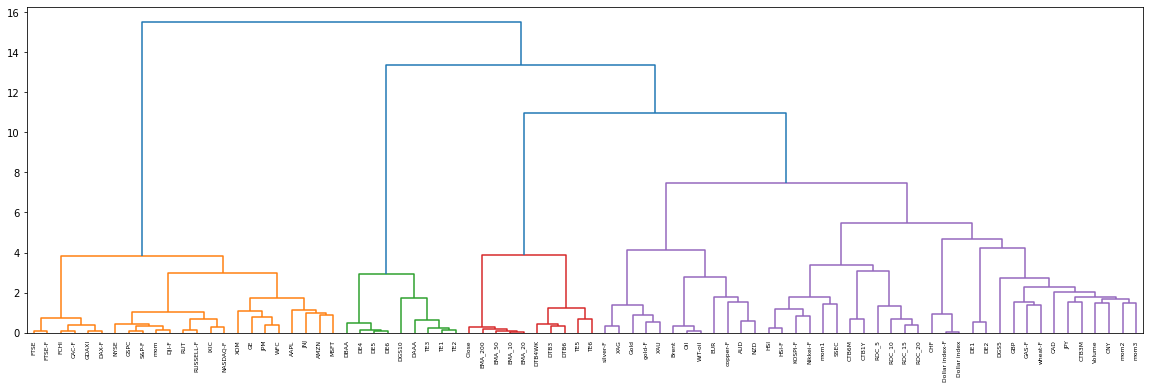

In [29]:
corr = spearmanr(X).correlation

corr_linkage = hierarchy.ward(corr)

from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

dendro = hierarchy.dendrogram(
    corr_linkage, labels=X.columns.tolist(), leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

In [24]:
cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

In [28]:
X_train_sel = X.iloc[:, selected_features]

X_train_sel

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,DTB4WK,DGS5,...,CTB3M,CTB6M,AUD,copper-F,EUR,KOSPI-F,GAS-F,silver-F,CHF,wheat-F
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-15,11062.780273,3.599483,-0.002865,-0.000136,0.006867,0.000914,0.511515,2.152424,0.14,1.20,...,0.000000,-0.026316,-0.37,0.66,-0.72,0.10,-3.34,-1.72,0.35,-0.30
2010-10-18,11143.690430,-0.721694,0.007314,-0.002865,-0.000136,0.006867,1.211140,3.649996,0.14,1.14,...,0.058824,0.027027,-0.09,0.42,-0.22,-2.06,-2.94,0.92,0.07,-2.05
2010-10-19,10978.620117,0.062238,-0.014813,0.007314,-0.002865,-0.000136,-0.379118,0.309742,0.14,1.11,...,0.000000,-0.026316,-2.09,-2.47,-1.53,-1.21,2.39,-2.59,1.27,-2.58
2010-10-20,11107.969727,-0.216333,0.011782,-0.014813,0.007314,-0.002865,0.107152,1.279393,0.14,1.11,...,-0.055556,-0.054054,1.83,0.88,1.69,0.79,0.74,1.03,-1.01,2.52
2010-10-21,11146.570313,-1.527112,0.003475,0.011782,-0.014813,0.007314,0.468698,1.808364,0.13,1.15,...,0.058824,0.057143,-0.89,-0.32,-0.34,0.41,-4.83,-3.69,0.64,-3.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-09,23461.939453,6.511740,-0.004304,0.000260,0.000374,0.000392,-0.230990,0.261016,1.05,2.01,...,0.007407,-0.012121,0.01,-0.42,0.41,-0.47,0.79,-0.62,-0.61,0.53
2017-11-10,23422.210938,-0.991838,-0.001693,-0.004304,0.000260,0.000374,-0.496952,-0.051116,1.03,2.06,...,0.007353,0.024540,-0.22,-0.32,0.20,-0.22,0.41,-0.58,0.18,0.70
2017-11-13,23439.699219,-65.347705,0.000747,-0.001693,-0.004304,0.000260,-0.461690,0.389567,1.04,2.08,...,0.000000,0.017964,-0.52,1.34,0.05,-0.40,-1.43,0.72,0.06,-1.85
